**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
!pip install chart_studio
import chart_studio.plotly as py

from plotly.subplots import make_subplots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1=pd.read_csv("survey.csv")
df2=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")


In [ ]:
# Select only the desired columns from df2
selected_columns = df2[['Sleep Duration', 'Stress Level']]

# Concatenate the selected columns from df2 to df1 (along columns)
df = pd.concat([df1, selected_columns], axis=1)


In [ ]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Sleep Duration,Stress Level
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,6.1,6.0
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,No,No,No,Don't know,No,NaN,6.2,8.0
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,Yes,Yes,Yes,Yes,No,No,NaN,6.2,8.0
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,5.9,8.0
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,5.9,8.0
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,No,Yes,Yes,No,Maybe,Don't know,No,NaN,5.9,8.0
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Maybe,Some of them,No,No,No,Don't know,No,NaN,6.3,7.0
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,No,No,No,No,No,No,No,NaN,7.8,6.0
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,No,Yes,Yes,No,Maybe,No,No,NaN,7.8,6.0
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN,7.8,6.0


**Descriptive analysis**

In [ ]:
df.shape

(1259, 29)

In [ ]:

df.describe()

,Age,Sleep Duration,Stress Level
count,1.259000e+03,374.000000,374.000000
mean,7.942815e+07,7.132086,5.385027
std,2.818299e+09,0.795657,1.774526
min,-1.726000e+03,5.800000,3.000000
25%,2.700000e+01,6.400000,4.000000
50%,3.100000e+01,7.200000,5.000000
75%,3.600000e+01,7.800000,7.000000
max,1.000000e+11,8.500000,8.000000


In [ ]:
df.dtypes

Timestamp                     object
Age                            int64
Gender                        object
Country                       object
state                         object
self_employed                 object
family_history                object
treatment                     object
work_interfere                object
no_employees                  object
remote_work                   object
tech_company                  object
benefits                      object
care_options                  object
wellness_program              object
seek_help                     object
anonymity                     object
leave                         object
mental_health_consequence     object
phys_health_consequence       object
coworkers                     object
supervisor                    object
mental_health_interview       object
phys_health_interview         object
mental_vs_physical            object
obs_consequence               object
comments                      object
S

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  1259 non-null   object 
 1   Age                        1259 non-null   int64  
 2   Gender                     1259 non-null   object 
 3   Country                    1259 non-null   object 
 4   state                      744 non-null    object 
 5   self_employed              1241 non-null   object 
 6   family_history             1259 non-null   object 
 7   treatment                  1259 non-null   object 
 8   work_interfere             995 non-null    object 
 9   no_employees               1259 non-null   object 
 10  remote_work                1259 non-null   object 
 11  tech_company               1259 non-null   object 
 12  benefits                   1259 non-null   object 
 13  care_options               1259 non-null   objec

In [ ]:
df.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
Sleep Duration                 27
Stress Level                    6
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Sleep Duration,Stress Level
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,No,Some of them,Some of them,No,No,Don't know,No,NaN,NaN,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,Some of them,Yes,No,No,Yes,No,NaN,NaN,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,No,No,No,No,No,No,NaN,NaN,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,No,No,No,No,No,No,No,NaN,NaN,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,No,Some of them,No,No,No,Don't know,No,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Sleep Duration',
       'Stress Level'],
      dtype='object')

In [ ]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
Sleep Duration                885
Stress Level                  885
dtype: int64

In [ ]:
## check numerical data types
numerical_columns=df.select_dtypes(include=["int64","float64"]).columns
print("Numerical columns:")
for i in numerical_columns:
  unique_values=df[i].unique()
  print(f"{i}:{unique_values}")


Numerical columns:
Age:[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Sleep Duration:[6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2 nan]
Stress Level:[ 6.  8.  7.  4.  3.  5. nan]


In [ ]:
## check object data types
object_columns=df.select_dtypes(include=["object"]).columns
print("object columns:")
for i in object_columns:
  unique_values=df[i].unique()
  print(f"{i}:{unique_values}")

Numerical columns:


**EXPLORATRY DATA ANALYSIS**

In [ ]:
x = df.Gender.value_counts().index.tolist()[::-1]
y = df.Gender.value_counts().tolist()[::-1]
data = pd.DataFrame({'name': x, 'count': y})

fig = px.bar(data, x="count", y="name", orientation='h')

# Update Figure Visuals
fig.update_layout(
    height=1000, width=800,
    template="plotly_dark",
    title_text="Gender Count" # Name of Plot
    )

fig.show()

In [ ]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [ ]:
# Interactive tool to relabel Gender Pronouns
# If Male pronoun enter 1
# If Female pronoun enter 2
# If Other, press any other button

male_pronouns = []
female_pronouns =[]
other = []

for p in df.Gender.unique():
  print(p)
  x = input()
  if x == '1': # male
    male_pronouns.append(p)
  elif x == '2': # female
    female_pronouns.append(p)
  else: # other
    other.append(p)


Female
2
M
1
Male
1
male
1
female
2
m
1
Male-ish
1
maile
1
Trans-female
3
Cis Female
2
F
2
something kinda male?
3
Cis Male
1
Woman
2
f
2
Mal
1
Male (CIS)
1
queer/she/they
3
non-binary
3
Femake
2
woman
2
Make
1
Nah
3
All
3
Enby
3
fluid
3
Genderqueer
3
Female 
2
Androgyne
3
Agender
3
cis-female/femme
2
Guy (-ish) ^_^
3
male leaning androgynous
3
Male 
1
Man
1
Trans woman
3
msle
1
Neuter
3
Female (trans)
3
queer
3
Female (cis)
2
Mail
1
cis male
1
A little about you
3
Malr
1
p
3
femail
2
Cis Man
1
ostensibly male, unsure what that really means
3


In [ ]:
male_pronouns


['M',
 'Male',
 'male',
 'm',
 'Male-ish',
 'maile',
 'Cis Male',
 'Mal',
 'Male (CIS)',
 'Make',
 'Male ',
 'Man',
 'msle',
 'Mail',
 'cis male',
 'Malr',
 'Cis Man']

In [ ]:
female_pronouns

['Female',
 'female',
 'Cis Female',
 'F',
 'Woman',
 'f',
 'Femake',
 'woman',
 'Female ',
 'cis-female/femme',
 'Female (cis)',
 'femail']

In [ ]:
other

['Trans-female',
 'something kinda male?',
 'queer/she/they',
 'non-binary',
 'Nah',
 'All',
 'Enby',
 'fluid',
 'Genderqueer',
 'Androgyne',
 'Agender',
 'Guy (-ish) ^_^',
 'male leaning androgynous',
 'Trans woman',
 'Neuter',
 'Female (trans)',
 'queer',
 'A little about you',
 'p',
 'ostensibly male, unsure what that really means']

In [ ]:
# Change the names of some genders
reduced_pronouns = [{p: 'Male' for p in male_pronouns},
                    {p: 'Female' for p in female_pronouns},
                    {p: 'Other' for p in other}]

for p in reduced_pronouns:
  df.Gender = df.Gender.replace(p)

In [ ]:
df.Gender.value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [ ]:
# check value count
x = df.Gender.value_counts().index.tolist()
y = df.Gender.value_counts().tolist()

fig = make_subplots(rows=1, cols=2)

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]])


DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

colors = DEFAULT_PLOTLY_COLORS[:len(x)]

# Add bar graph of Gender Count
fig.add_trace(
    go.Bar(x=x, y=y,
           text=y,
           textposition='auto',
           marker_color=colors,
           showlegend=False),
    row=1, col=1
)

# Add pie chart of Gender Count
fig.add_trace(
    go.Pie(labels=x, values=y,
           marker_colors=colors
           ),
    row=1, col=2
)

# Update Figure Visuals
fig.update_layout(
    height=600, width=800,
    template="plotly_dark",
    title_text="Gender Count" # Name of Plot
    )

fig.show()

In [ ]:
x = df.state.value_counts().index.tolist()
y = df.state.value_counts().tolist()


fig = go.Figure(go.Bar(x=x,y=y))
fig.show()

In [ ]:
import plotly.express as px
# survey sample population in USA
fig = px.choropleth(locations=x, locationmode="USA-states", color=y,
                    scope="usa",
                    color_continuous_scale = 'Reds')

fig.update_layout(
    title_text = ' Mental Health Survey',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [ ]:
# oldest person ever lived is 122
# assume only employing adults (>18)
idx = (df.Age >= 18) & (df.Age < 122)

x = df.Age[idx].value_counts().index.tolist()
y = df.Age[idx].value_counts().tolist()

fig = go.Figure(
    go.Bar(x=x,y=y)
    )

fig.update_layout(
    title_text = 'Age distribution graph',

)

fig.show()

**DISTRIBUTION OF GENDER IN TECH**

In [ ]:
# Add histogram data
idx = (df.Age >= 18) & (df.Age < 122) & (df.tech_company=='Yes')
x1 = df.Age[idx][df.Gender=='Male']
x2 = df.Age[idx][df.Gender=='Female']

# Group data together
hist_data = [x1, x2]

group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels)
fig.show()

**Distribution of Gender Overall**

In [ ]:
# Add histogram data
idx = (df.Age >= 18) & (df.Age < 122)
x1 = df.Age[idx][df.Gender=='Male']
x2 = df.Age[idx][df.Gender=='Female']

# Group data together
hist_data = [x1, x2]

group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [ ]:
column_names = ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
                'family_history', 'treatment', 'work_interfere', 'no_employees',
                'remote_work', 'tech_company', 'benefits', 'care_options',
                'wellness_program', 'seek_help', 'anonymity', 'leave',
                'mental_health_consequence', 'phys_health_consequence', 'coworkers',
                'supervisor', 'mental_health_interview', 'phys_health_interview',
                'mental_vs_physical', 'obs_consequence', 'comments']

ordered_labels = {
    'Gender': ['Male', 'Female', 'Other'],
    'anonymity': ['No', 'Yes', "Don't know"],
    'benefits': ['No', 'Yes', "Don't know"],
    'care_options': ['No', 'Yes', 'Not sure'],
    'coworkers': ['No', 'Some of them', 'Yes'],
    'family_history': ['No', 'Yes'],
    'leave': ['Very difficult',
      'Somewhat difficult',
      'Somewhat easy',
      'Very easy',
      "Don't know"],
    'mental_health_consequence': ['No', 'Maybe', 'Yes'],
    'mental_health_interview': ['No', 'Maybe', 'Yes'],
    'mental_vs_physical': ['No', 'Yes', "Don't know"],
    'no_employees': ['1-5',
      '6-25',
      '26-100',
      '100-500',
      '500-1000',
      'More than 1000'],
    'obs_consequence': ['No', 'Yes'],
    'phys_health_consequence': ['No', 'Maybe', 'Yes'],
    'phys_health_interview': ['No', 'Maybe', 'Yes'],
    'remote_work': ['No', 'Yes'],
    'seek_help': ['No', 'Yes', "Don't know"],
    'self_employed': ['No', 'Yes'],
    'supervisor': ['No', 'Some of them', 'Yes'],
    'tech_company': ['No', 'Yes'],
    'treatment': ['No', 'Yes'],
    'wellness_program': ['No', 'Yes', "Don't know"],
    'work_interfere': ['Never', 'Rarely', 'Sometimes', 'Often']
    }

In [ ]:
# find all columns with at most 5 unique entries for bar graph
bars = []
for c in df.columns:
  if len(df[c].unique()) <=6:
    bars.append(c)

size = round(len(bars)**(1/2))

fig = make_subplots(
    rows=size, cols=size,
    subplot_titles=bars)

j = 1
for i, c in enumerate(bars):
  x_temp = df[c].value_counts().index.tolist()
  y_temp = df[c].value_counts().tolist()

  # resort x labels
  x = []
  y = []
  for label in ordered_labels[c]:
    try:
      index = x_temp.index(label)
      x.append(x_temp[index])
      y.append(y_temp[index])
    except Exception as e:
      x.append(label)
      y.append(0)

  if i % size == 0 and i > 0:
      j += 1

  # add figure to subplot
  fig.add_trace(go.Bar(x=x, y=y,
                       text=y,
                       textposition='auto',
                       showlegend=False),
                row=j, col=(i % size)+1)

fig.update_layout(title_text="Mental Health Survey In Tech",
                  height=1000,
                  # width=800,
                  )

fig.show()

In [ ]:
import plotly.graph_objects as go
def stacked_horizontal_bar(x_data, y_data, top_labels):
  # function to display stacked horizontal bar chart

  colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

  colors = colors[:len(top_labels)]

  fig = go.Figure()

  for i in range(0, len(x_data[0])):
      for xd, yd in zip(x_data, y_data):
          fig.add_trace(go.Bar(
              x=[xd[i]], y=[yd],
              width=0.75,
              orientation='h',
              marker=dict(
                  color=colors[i],
                  line=dict(color='rgb(248, 248, 249)', width=1)
              )
          ))

  fig.update_layout(
      xaxis=dict(
          showgrid=False,
          showline=False,
          showticklabels=False,
          zeroline=False,
          domain=[0.15, 1]
      ),
      yaxis=dict(
          showgrid=False,
          showline=False,
          showticklabels=False,
          zeroline=False,
      ),
      barmode='stack',
      paper_bgcolor='rgb(248, 248, 255)',
      plot_bgcolor='rgb(248, 248, 255)',
      margin=dict(l=120, r=10, t=100, b=80),
      showlegend=False,
  )

  annotations = []

  for yd, xd in zip(y_data, x_data):
      # labeling the y-axis
      annotations.append(dict(xref='paper', yref='y',
                              x=0.14, y=yd,
                              xanchor='right',
                              text=str(yd),
                              font=dict(family='Arial', size=14,
                                        color='rgb(67, 67, 67)'),
                              showarrow=False, align='right'))
      # labeling the first percentage of each bar (x_axis)
      annotations.append(dict(xref='x', yref='y',
                              x=xd[0] / 2, y=yd,
                              text=str(xd[0]) + '%',
                              font=dict(family='Arial', size=14,
                                        color='rgb(248, 248, 255)'),
                              showarrow=False))
      # labeling the first Likert scale (on the top)
      if yd == y_data[-1]:
          annotations.append(dict(xref='x', yref='paper',
                                  x=xd[0] / 2, y=1.1,
                                  text=top_labels[0],
                                  font=dict(family='Arial', size=14,
                                            color='rgb(67, 67, 67)'),
                                  showarrow=False))
      space = xd[0]
      for i in range(1, len(xd)):
              # labeling the rest of percentages for each bar (x_axis)
              annotations.append(dict(xref='x', yref='y',
                                      x=space + (xd[i]/2), y=yd,
                                      text=str(xd[i]) + '%',
                                      font=dict(family='Arial', size=14,
                                                color='rgb(248, 248, 255)'),
                                      showarrow=False))
              # labeling the Likert scale
              if yd == y_data[-1]:
                  annotations.append(dict(xref='x', yref='paper',
                                          x=space + (xd[i]/2), y=1.1,
                                          text=top_labels[i],
                                          font=dict(family='Arial', size=14,
                                                    color='rgb(67, 67, 67)'),
                                          showarrow=False))
              space += xd[i]

  fig.update_layout(annotations=annotations)

  fig.show()

In [ ]:
top_labels = ['No', 'Yes']

y_data = ['tech_company',
          'self_employed',
          'family_history',
          'treatment',
          'remote_work',
          'obs_consequence'
]
# reorder because labeling is inverted
y_data = list(reversed(y_data))

# return percentages
x_data = []
for label in y_data:
  d = df[label].value_counts() / sum(df[label].value_counts())
  d = round(d*100, 0).apply(int)
  x_data.append(list(d))

y_data_description = {
    'self_employed' : 'Are you self-employed?',

    'family_history' : 'Do you have a family <br>'+
                      'history of mental illness?',

    'treatment' : 'Have you sought treatment <br>' +
                  'for a mental health condition?',

    'remote_work' : 'Do you work remotely<br>'+
                  'at least 50% of the time?',

    'tech_company' : 'Is your employer primarily<br>'+
                    'a tech company/organization?',

    'obs_consequence' : 'Have you heard of or observed<br>'+
                        'negative consequences for<br>'+
                        'coworkers with mental health<br>' +
                        'conditions in your workplace?'
}


y_data = [y_data_description[y] for y in y_data]

stacked_horizontal_bar(x_data, y_data, top_labels)

In [ ]:
top_labels = ['No', 'Some of them', 'Yes']

y_data = ['coworkers',
          'supervisor',
]

# reorder because labeling is inverted
y_data = list(reversed(y_data))

# return percentages
x_data = []
for label in y_data:
  d = df[label].value_counts() / sum(df[label].value_counts())
  d = round(d*100, 0).apply(int)
  x_data.append(list(d))

y_data_description = {
    'coworkers' :
      'Would you be willing to discuss<br>'+
      'a mental health issue<br>' +
      'with your coworkers?',

    'supervisor' :
      'Would you be willing to discuss<br>' +
      'a mental health issue<br>' +
      'with your direct supervisor(s)?'
}


y_data = [y_data_description[y] for y in y_data]

stacked_horizontal_bar(x_data, y_data, top_labels)

**WORDCLOUD FOR COMMENTS**

  0%|          | 0/164 [00:00<?, ?it/s]

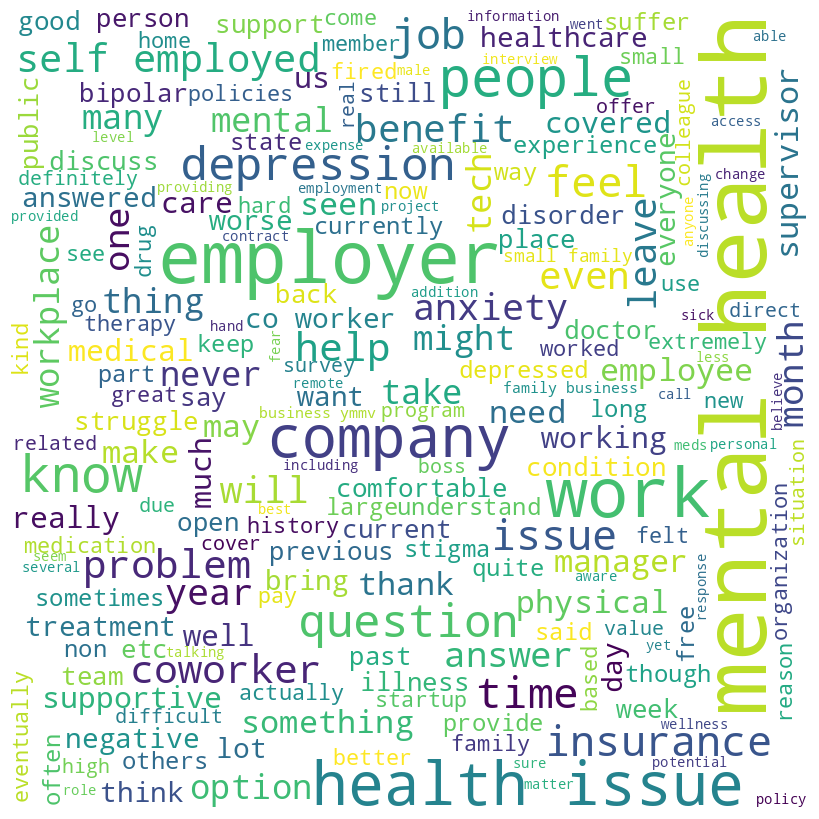

In [ ]:


# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm # loading bar

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tqdm(df.comments[~df.comments.isnull()]):

  # typecaste each val to string
  val = str(val)

  # split the value
  tokens = val.split()

  # Converts each token into lowercase
  for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()

  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Sleep Duration,Stress Level
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,6.1,6.0
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,No,No,No,Don't know,No,NaN,6.2,8.0
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,Yes,Yes,Yes,Yes,No,No,NaN,6.2,8.0
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,5.9,8.0
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,5.9,8.0


**DATA PREPROCESSING**

**i) Fill the missing values**

In [ ]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
Sleep Duration                885
Stress Level                  885
dtype: int64

In [ ]:
## fill the missing values

## For the self-employed column

mode_value=df["self_employed"].mode()[0]
df["self_employed"].fillna(mode_value,inplace=True)
df["self_employed"].isnull().sum()


0

In [ ]:
## filling the missing values for string objects

## for the states column

df["state"].fillna("NaN",inplace=True)


## for the work interfere column
df["work_interfere"].fillna("NaN",inplace=True)

## For the comments column
df["comments"].fillna("Unknown",inplace=True)





In [ ]:
##for the sleep duration column

# Define the range for random values
min_value = 5.8
max_value = 8.5

# Function to fill missing values randomly within the specified range
def fill_missing_randomly(value):
    if np.isnan(value):
        return np.random.uniform(min_value, max_value)
    return value

# Apply the fill_missing_randomly function to the column with missing values
df['Sleep Duration'] = df['Sleep Duration'].apply(fill_missing_randomly)

In [ ]:
##for the stress levels column

# Define the range for random values
min_value = 3
max_value = 8

# Function to fill missing values randomly within the specified range
def fill_missing_randomly(value):
    if np.isnan(value):
        return np.random.uniform(min_value, max_value)
    return value

# Apply the fill_missing_randomly function to the column with missing values
df['Stress Level'] = df['Stress Level'].apply(fill_missing_randomly)

In [ ]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
Sleep Duration               0
Stress Level                 0
dtype: int64

In [ ]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Sleep Duration,Stress Level
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,No,Some of them,Yes,No,Maybe,Yes,No,Unknown,6.1,6.0
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,No,No,No,No,No,Don't know,No,Unknown,6.2,8.0
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,No,Yes,Yes,Yes,Yes,No,No,Unknown,6.2,8.0
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,Unknown,5.9,8.0
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,Unknown,5.9,8.0
5,2014-08-27 11:31:22,33,Male,United States,TN,No,Yes,No,Sometimes,6-25,...,No,Yes,Yes,No,Maybe,Don't know,No,Unknown,5.9,8.0
6,2014-08-27 11:31:50,35,Female,United States,MI,No,Yes,Yes,Sometimes,1-5,...,Maybe,Some of them,No,No,No,Don't know,No,Unknown,6.3,7.0
7,2014-08-27 11:32:05,39,Male,Canada,NaN,No,No,No,Never,1-5,...,No,No,No,No,No,No,No,Unknown,7.8,6.0
8,2014-08-27 11:32:39,42,Female,United States,IL,No,Yes,Yes,Sometimes,100-500,...,No,Yes,Yes,No,Maybe,No,No,Unknown,7.8,6.0
9,2014-08-27 11:32:43,23,Male,Canada,NaN,No,No,No,Never,26-100,...,No,Yes,Yes,Maybe,Maybe,Yes,No,Unknown,7.8,6.0


In [ ]:
df["Gender"].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [ ]:
df["self_employed"].value_counts()

No     1113
Yes     146
Name: self_employed, dtype: int64

In [ ]:
df["work_interfere"]=df["work_interfere"].replace()

In [ ]:
# Define the value to be replaced and the replacement value
value_to_replace = 'NaN'
replacement_value = 'Not sure'

# Replace the specific value with the replacement value
df['work_interfere'] = df['work_interfere'].replace(value_to_replace, replacement_value)

In [ ]:
df["work_interfere"].value_counts()

Sometimes    465
Not sure     264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

**Dropping unwanted columns**

In [ ]:
# Drop columns
df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)
df=df.drop(["coworkers"], axis=1)
df=df.drop(["supervisor"], axis=1)


**Handling outliers in AGE column**

In [ ]:
# Filling missing values with the median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Handling values below 18
df.loc[df['Age'] < 18, 'Age'] = median_age

# Handling values above 120
df.loc[df['Age'] > 120, 'Age'] = median_age

# Creating the 'age_range' column
bins = [0, 20, 55, 70, 100]
labels = ["0-20", "21-55", "56-70", "71-100"]
df['age_range'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Define a mapping for age ranges to numerical values
age_range_mapping = {
    '0-20': 1,
    '21-55': 2,
    '56-70': 3,
    '71-100': 4
}

# Use the mapping to convert the 'Age Range' column to numerical values
df['Age_Range(Numerical)'] = df['age_range'].map(age_range_mapping)


In [ ]:
df['Age_Range(Numerical)'].value_counts()

2    1223
1      22
3      13
4       1
Name: Age_Range(Numerical), dtype: int64

In [ ]:
df["Age"]

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Label encoding Object
le = LabelEncoder()

# columns for label encoding
cols = df.select_dtypes(include=['object']).columns

# label encoding
for col in cols:

    df[col] = le.fit_transform(df[col])
    print(col, df[col].unique())

Risk Level [1 0 2]


In [ ]:
df=df.drop(["Country"],axis=1)

In [ ]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sleep Duration,Stress Level,age_range,Age_Range(Numerical)
0,37,0,0,0,1,2,4,0,1,2,...,1,1,1,0,2,0,6.100000,6.000000,21-55,2
1,44,1,0,0,0,3,5,0,0,0,...,0,1,1,1,0,0,6.200000,8.000000,21-55,2
2,32,1,0,0,0,3,4,0,1,1,...,1,1,2,2,1,0,6.200000,8.000000,21-55,2
3,31,1,0,1,1,2,2,0,1,1,...,2,2,0,0,1,1,5.900000,8.000000,21-55,2
4,31,1,0,0,0,0,1,1,1,2,...,1,1,2,2,0,0,5.900000,8.000000,21-55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,1,1,2,0,1,1,...,1,1,1,1,0,0,6.212942,5.048072,21-55,2
1255,32,1,0,1,1,2,2,1,1,2,...,1,1,1,1,2,0,7.922786,5.119726,21-55,2
1256,34,1,0,1,1,4,5,0,1,2,...,2,2,1,1,1,0,7.963684,5.678919,21-55,2
1257,46,0,0,0,0,1,1,1,1,1,...,2,1,1,1,1,0,6.702787,6.712239,21-55,2


In [ ]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sleep Duration,Stress Level,age_range,Age_Range(Numerical)
0,37,0,0,0,1,2,4,0,1,2,...,1,1,1,0,2,0,6.100000,6.000000,21-55,2
1,44,1,0,0,0,3,5,0,0,0,...,0,1,1,1,0,0,6.200000,8.000000,21-55,2
2,32,1,0,0,0,3,4,0,1,1,...,1,1,2,2,1,0,6.200000,8.000000,21-55,2
3,31,1,0,1,1,2,2,0,1,1,...,2,2,0,0,1,1,5.900000,8.000000,21-55,2
4,31,1,0,0,0,0,1,1,1,2,...,1,1,2,2,0,0,5.900000,8.000000,21-55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,1,1,2,0,1,1,...,1,1,1,1,0,0,6.212942,5.048072,21-55,2
1255,32,1,0,1,1,2,2,1,1,2,...,1,1,1,1,2,0,7.922786,5.119726,21-55,2
1256,34,1,0,1,1,4,5,0,1,2,...,2,2,1,1,1,0,7.963684,5.678919,21-55,2
1257,46,0,0,0,0,1,1,1,1,1,...,2,1,1,1,1,0,6.702787,6.712239,21-55,2


**RISK LEVEL CALCULATION**

In [ ]:
# Assign risk levels based on the calculated risk score
def assign_risk_level(row):
  family_history=row['family_history']
  sleep_duration=row['Sleep Duration']
  stress_level=row['Stress Level']
  age_range=row['age_range']


  if family_history == 1 or age_range=='21-50':

    if sleep_duration<6.5 or stress_level>7:
      return "High risk"
    elif (6.5<sleep_duration<7.5) or (6<stress_level<7):
      return "Medium risk"
    else:
      return "Low risk"
  elif family_history ==1 and age_range =='0-20':
    return "Low risk"
  else:
    return "Low risk"





df['Risk Level'] = df.apply(assign_risk_level,axis=1)





In [ ]:
df["Risk Level"].value_counts()
##[2-"Medium risk", 1-"Low risk", 2-"high risk"]


Low risk       914
High risk      179
Medium risk    166
Name: Risk Level, dtype: int64

In [ ]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sleep Duration,Stress Level,age_range,Age_Range(Numerical),Risk Level
0,37,0,0,0,1,2,4,0,1,2,...,1,1,0,2,0,6.100000,6.000000,21-55,2,Low risk
1,44,1,0,0,0,3,5,0,0,0,...,1,1,1,0,0,6.200000,8.000000,21-55,2,Low risk
2,32,1,0,0,0,3,4,0,1,1,...,1,2,2,1,0,6.200000,8.000000,21-55,2,Low risk
3,31,1,0,1,1,2,2,0,1,1,...,2,0,0,1,1,5.900000,8.000000,21-55,2,High risk
4,31,1,0,0,0,0,1,1,1,2,...,1,2,2,0,0,5.900000,8.000000,21-55,2,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,1,1,2,0,1,1,...,1,1,1,0,0,6.212942,5.048072,21-55,2,Low risk
1255,32,1,0,1,1,2,2,1,1,2,...,1,1,1,2,0,7.922786,5.119726,21-55,2,Low risk
1256,34,1,0,1,1,4,5,0,1,2,...,2,1,1,1,0,7.963684,5.678919,21-55,2,Low risk
1257,46,0,0,0,0,1,1,1,1,1,...,1,1,1,1,0,6.702787,6.712239,21-55,2,Low risk


In [ ]:
df[(df["family_history"] == 1) & (df["treatment"] == 1)]

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sleep Duration,Stress Level,age_range,Age_Range(Numerical),Risk Level
3,31,1,0,1,1,2,2,0,1,1,...,2,0,0,1,1,5.900000,8.000000,21-55,2,High risk
6,35,0,0,1,1,4,0,1,1,1,...,0,1,1,0,0,6.300000,7.000000,21-55,2,High risk
8,42,0,0,1,1,4,1,0,1,2,...,1,1,0,1,0,7.800000,6.000000,21-55,2,Low risk
12,42,0,0,1,1,4,2,0,0,2,...,2,0,0,1,1,6.100000,8.000000,21-55,2,High risk
15,29,0,0,1,1,3,2,0,1,2,...,1,0,0,0,0,6.000000,8.000000,21-55,2,High risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,36,1,0,1,1,2,1,0,0,1,...,1,1,2,2,0,7.396110,3.640608,21-55,2,Medium risk
1252,29,1,0,1,1,4,1,1,1,2,...,1,1,0,1,0,8.321769,5.446521,21-55,2,Low risk
1255,32,1,0,1,1,2,2,1,1,2,...,1,1,1,2,0,7.922786,5.119726,21-55,2,Low risk
1256,34,1,0,1,1,4,5,0,1,2,...,2,1,1,1,0,7.963684,5.678919,21-55,2,Low risk


In [ ]:
## scaling the age values
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the 'Age' column
df['Age'] = scaler.fit_transform(df[['Age']])


In [ ]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sleep Duration,Stress Level,age_range,Age_Range(Numerical),Risk Level
0,0.351852,0,0,0,1,2,4,0,1,2,...,1,1,0,2,0,6.100000,6.000000,21-55,2,Low risk
1,0.481481,1,0,0,0,3,5,0,0,0,...,1,1,1,0,0,6.200000,8.000000,21-55,2,Low risk
2,0.259259,1,0,0,0,3,4,0,1,1,...,1,2,2,1,0,6.200000,8.000000,21-55,2,Low risk
3,0.240741,1,0,1,1,2,2,0,1,1,...,2,0,0,1,1,5.900000,8.000000,21-55,2,High risk
4,0.240741,1,0,0,0,0,1,1,1,2,...,1,2,2,0,0,5.900000,8.000000,21-55,2,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.148148,1,0,0,1,1,2,0,1,1,...,1,1,1,0,0,6.212942,5.048072,21-55,2,Low risk
1255,0.259259,1,0,1,1,2,2,1,1,2,...,1,1,1,2,0,7.922786,5.119726,21-55,2,Low risk
1256,0.296296,1,0,1,1,4,5,0,1,2,...,2,1,1,1,0,7.963684,5.678919,21-55,2,Low risk
1257,0.518519,0,0,0,0,1,1,1,1,1,...,1,1,1,1,0,6.702787,6.712239,21-55,2,Low risk


**CORRELATION HEATMAP**

<Axes: >

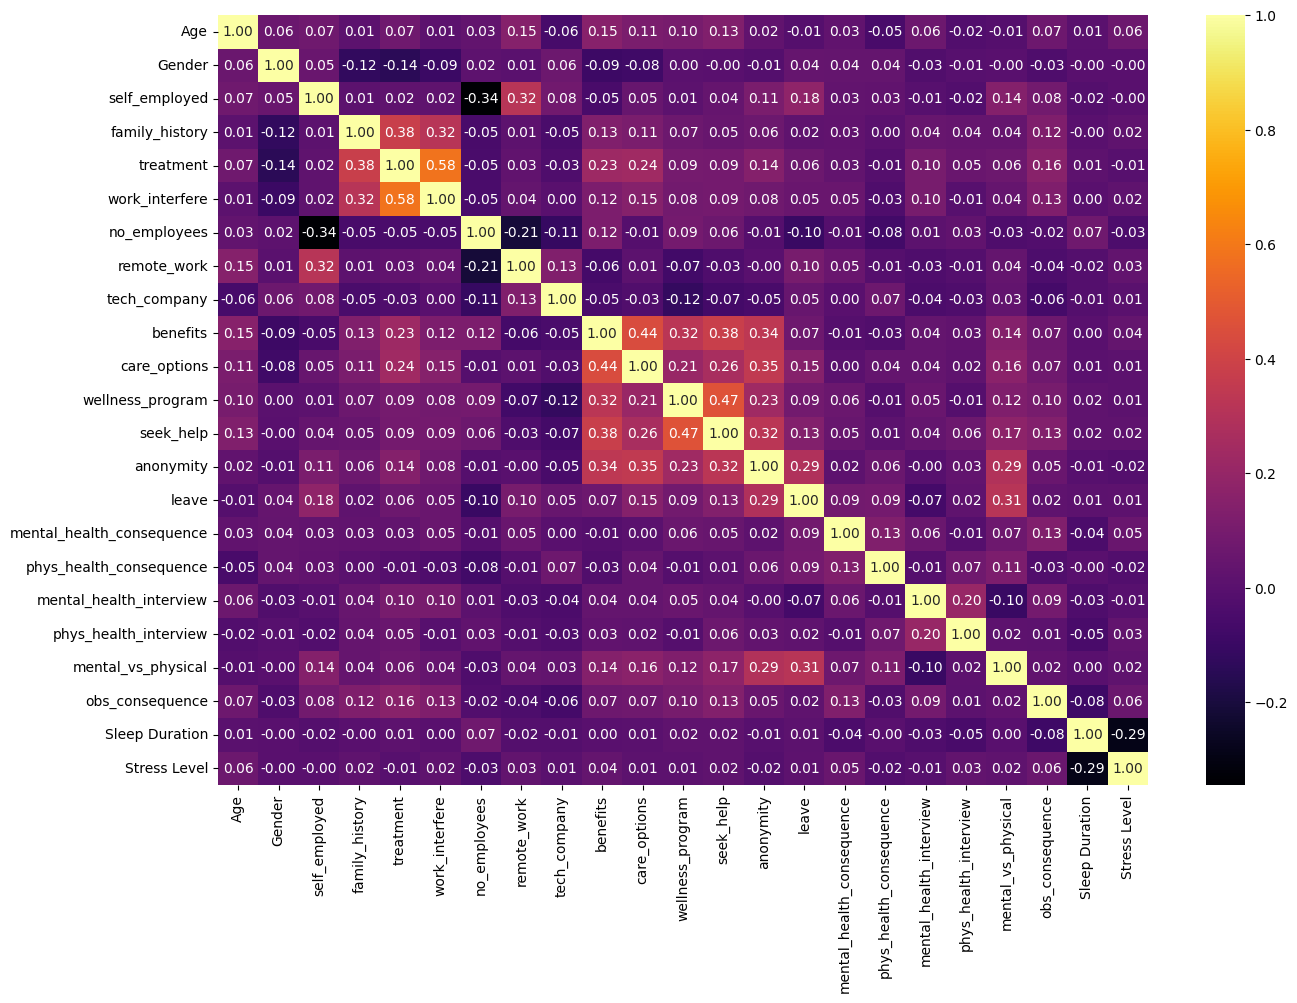

In [ ]:
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(), annot=True, cmap='inferno', fmt='.2f')


In [ ]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sleep Duration,Stress Level,age_range,Age_Range(Numerical),Risk Level
0,0.351852,0,0,0,1,2,4,0,1,2,...,1,1,0,2,0,6.100000,6.000000,21-55,2,Low risk
1,0.481481,1,0,0,0,3,5,0,0,0,...,1,1,1,0,0,6.200000,8.000000,21-55,2,Low risk
2,0.259259,1,0,0,0,3,4,0,1,1,...,1,2,2,1,0,6.200000,8.000000,21-55,2,Low risk
3,0.240741,1,0,1,1,2,2,0,1,1,...,2,0,0,1,1,5.900000,8.000000,21-55,2,High risk
4,0.240741,1,0,0,0,0,1,1,1,2,...,1,2,2,0,0,5.900000,8.000000,21-55,2,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.148148,1,0,0,1,1,2,0,1,1,...,1,1,1,0,0,6.212942,5.048072,21-55,2,Low risk
1255,0.259259,1,0,1,1,2,2,1,1,2,...,1,1,1,2,0,7.922786,5.119726,21-55,2,Low risk
1256,0.296296,1,0,1,1,4,5,0,1,2,...,2,1,1,1,0,7.963684,5.678919,21-55,2,Low risk
1257,0.518519,0,0,0,0,1,1,1,1,1,...,1,1,1,1,0,6.702787,6.712239,21-55,2,Low risk


In [ ]:
df["Risk Level"].value_counts()

Low risk       914
High risk      179
Medium risk    166
Name: Risk Level, dtype: int64

In [ ]:
## scaling the sleep duration values
from sklearn.preprocessing import StandardScaler
# Create a MinMaxScaler object
scaler = StandardScaler()

# Fit and transform the 'sleep duration' column
df['Sleep Duration'] = scaler.fit_transform(df[['Sleep Duration']])

# fit and transform the 'stress levels' column
df['Stress Level']=scaler.fit_transform(df[['Stress Level']])



In [ ]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sleep Duration,Stress Level,age_range,Age_Range(Numerical),Risk Level
0,0.351852,0,0,0,1,2,4,0,1,2,...,1,1,0,2,0,-1.376285,0.330613,21-55,2,1
1,0.481481,1,0,0,0,3,5,0,0,0,...,1,1,1,0,0,-1.247420,1.628642,21-55,2,1
2,0.259259,1,0,0,0,3,4,0,1,1,...,1,2,2,1,0,-1.247420,1.628642,21-55,2,1
3,0.240741,1,0,1,1,2,2,0,1,1,...,2,0,0,1,1,-1.634014,1.628642,21-55,2,0
4,0.240741,1,0,0,0,0,1,1,1,2,...,1,2,2,0,0,-1.634014,1.628642,21-55,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.148148,1,0,0,1,1,2,0,1,1,...,1,1,1,0,0,-1.230743,-0.287202,21-55,2,1
1255,0.259259,1,0,1,1,2,2,1,1,2,...,1,1,1,2,0,0.972643,-0.240698,21-55,2,1
1256,0.296296,1,0,1,1,4,5,0,1,2,...,2,1,1,1,0,1.025347,0.122227,21-55,2,1
1257,0.518519,0,0,0,0,1,1,1,1,1,...,1,1,1,1,0,-0.599505,0.792866,21-55,2,1


**Splitting the model**

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

columns_to_drop=["age_range","treatment"]
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=columns_to_drop,axis=1), df['treatment'], test_size=0.30, random_state=42)

**Model building**

**1) Random forest classifier**

In [ ]:
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Random Forest Classifier Object
clf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split':[2,4,6],
    'max_features':['auto','sqrt'],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid_clf = GridSearchCV(clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid_clf.fit(X_train,y_train)

#Best parameters for Decision Tree Classifier
print(grid_clf.best_params_)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


In [ ]:
y_pred=grid_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE RandomForestClassifier MODEL: ", accuracy*100)

ACCURACY OF THE RandomForestClassifier MODEL:  82.27513227513228


In [ ]:
#random forest classifier with best parameters
clf = RandomForestClassifier(criterion='gini', max_depth= 2, min_samples_leaf= 2, min_samples_split= 2, random_state= 0)

clf.fit(X_train, y_train)



##prediction on test data
y_pred= clf.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE RandomForestClassifier MODEL: ", accuracy*100)


ACCURACY OF THE RandomForestClassifier MODEL:  83.06878306878306


**2). Decision Tree classifier**

In [ ]:

from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtree = DecisionTreeClassifier()

In [ ]:
#Fitting the Decision Tree Classifier to the training data
dtree.fit(X_train,y_train)
#prediction on test data
d_pred = dtree.predict(X_test)

accuracy = metrics.accuracy_score(y_test, d_pred)
print("ACCURACY OF THE DESCISION TREE MODEL: ", accuracy*100)

ACCURACY OF THE DESCISION TREE MODEL:  74.07407407407408


In [ ]:
df["Risk Level"]

0       1
1       1
2       1
3       0
4       1
       ..
1254    1
1255    1
1256    1
1257    1
1258    1
Name: Risk Level, Length: 1259, dtype: int64

**K nearest neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## fitting the best parameters for k neighbors classifier
knn=KNeighborsClassifier(leaf_size= 20, metric= 'minkowski', n_neighbors= 10, p= 1, weights= 'uniform')

#Fitting the Decision Tree Classifier to the training data
knn.fit(X_train,y_train)

#prediction on test data
knn_pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, knn_pred)
print("ACCURACY OF THE K NEAREST NEIGHBORS MODEL: ", accuracy*100)




ACCURACY OF THE K NEAREST NEIGHBORS MODEL:  76.19047619047619


**support vector machines**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm = SVC(kernel='linear', C=1.0)

# Fit the model on the training data
svm.fit(X_train, y_train)

#prediction on test data
svm_pred=svm.predict(X_test)

accuracy = metrics.accuracy_score(y_test,svm_pred)
print("ACCURACY OF THE SUPPORT VECTOR MACHINES MODEL: ", accuracy*100)

ACCURACY OF THE SUPPORT VECTOR MACHINES MODEL:  80.42328042328042


**Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
nb_pred = nb_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, nb_pred)
print("ACCURACY OF THE NAIVE BAYES MODEL: ", accuracy*100)

ACCURACY OF THE NAIVE BAYES MODEL:  76.71957671957672


**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

#Fitting the Logistic Regression to the training data
lr.fit(X_train,y_train)

#prediction on test data
l_pred = lr.predict(X_test)

#calculate and print the accuracy
accuracy = accuracy_score(y_test, l_pred)
print("ACCURACY OF THE Logistic regression  MODEL: ", accuracy*100)

ACCURACY OF THE Logistic regression  MODEL:  78.57142857142857


**ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the AdaBoost classifier with a base estimator (e.g., Random forest)
base_estimator = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  # You can customize the base estimator
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=0)

# Fit the model on the training data
adaboost.fit(X_train, y_train)

# Make predictions on the test data
ad_pred = adaboost.predict(X_test)

#calculate and print the accuracy
accuracy = accuracy_score(y_test, ad_pred)
print("ACCURACY OF THE ADA BOOST MODEL: ", accuracy*100)



ACCURACY OF THE ADA BOOST MODEL:  83.86243386243386


**LightGBM**

In [ ]:
import lightgbm as lgb

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define the LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
}

# Train the LightGBM model
num_round = 100  # Number of boosting rounds
model = lgb.train(params, train_data, num_round)

# Make predictions on the test data
lgb_pred = model.predict(X_test, num_iteration=model.best_iteration)
lgb_pred = (lgb_pred > 0.5).astype(int)

#calculate and print the accuracy
accuracy = accuracy_score(y_test, lgb_pred)
print("ACCURACY OF THE LIGHTGBM MODEL: ", accuracy*100)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 440, number of negative: 441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 881, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499432 -> initscore=-0.002270
[LightGBM] [Info] Start training from score -0.002270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
ACCURACY OF THE LIGHTGBM MODEL:  80.95238095238095


**Neural Networks**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create a sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Make predictions on the test data
nn_pred = model.predict(X_test)
nn_pred = (nn_pred > 0.5)

#calculate and print the accuracy
accuracy = accuracy_score(y_test, nn_pred)
print("ACCURACY OF THE NeeurAL networks MODEL: ", accuracy*100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.7268 - accuracy: 0.5187
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5936
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6720
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7276
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.7605
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7764
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7934
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7934
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.8093
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8195
Epoch 11/

**MODEL EVALUATION**

**CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report

#classification report for Random Forest Classifier
print("Classification report for Random forest classifier:")
print(classification_report(y_test,y_pred))

#classification report for Decision Tree Classifier
print("Classification report for Decision tree classifier:")
print(classification_report(y_test,d_pred))


#classification report for K nearest neighbors
print("Classification report for K nearest neighbors:")
print(classification_report(y_test,knn_pred))

#classification report for Support vector machines(SVM)
print("Classification report for support vector machines:")
print(classification_report(y_test,svm_pred))

#classification report for Naive Bayes boost
print("Classification report for Naive Bayes:")
print(classification_report(y_test,nb_pred))

#classification report for Logistic regression
print("Classification report for Logistic regression:")
print(classification_report(y_test,l_pred))

#classification report for Ada boost
print("Classification report for Ada boost:")
print(classification_report(y_test,ad_pred))

#classification report for LIghtGBM boost
print("Classification report for LightGBMt:")
print(classification_report(y_test,lgb_pred))

#classification report for Neural Networks
print("Classification report for Neural Networks:")
print(classification_report(y_test,nn_pred))



Classification report for Random forest classifier:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       181
           1       0.78      0.93      0.85       197

    accuracy                           0.83       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.84      0.83      0.83       378

Classification report for Decision tree classifier:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       181
           1       0.76      0.74      0.75       197

    accuracy                           0.74       378
   macro avg       0.74      0.74      0.74       378
weighted avg       0.74      0.74      0.74       378

Classification report for K nearest neighbors:
              precision    recall  f1-score   support

           0       0.73      0.81      0.76       181
           1       0.80      0.72      0.76       197

    accuracy                   

**Confusion matrix**

Text(0.5, 1.0, 'Neural networks')

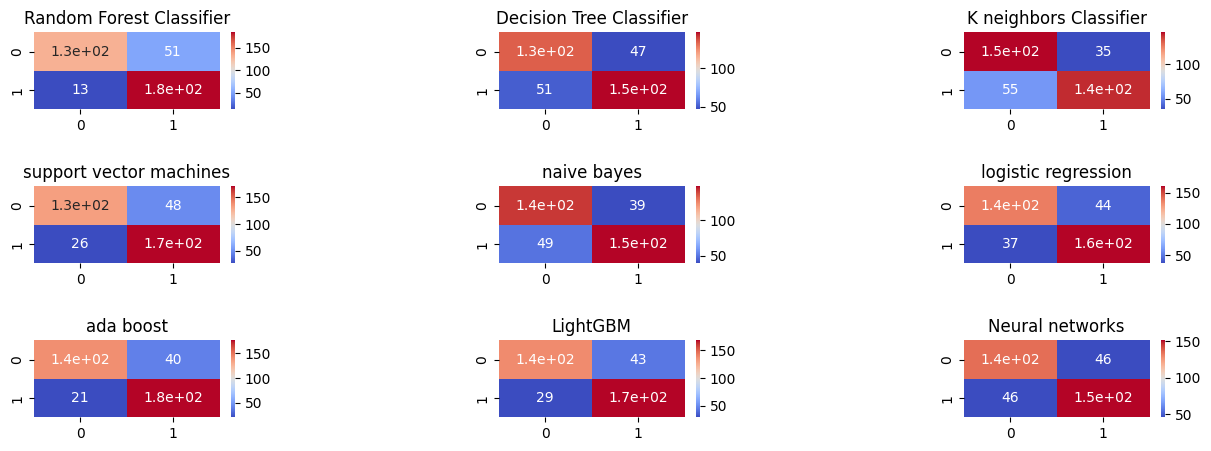

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(15,5))

# Adjust the horizontal space between subplots (leave a small gap)
plt.subplots_adjust(wspace=1)

# Adjust the vertical space between subplots (leave a small gap)
plt.subplots_adjust(hspace=1)


from sklearn.metrics import confusion_matrix


#confusion matrix for Random Forest Classifier
sn.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')

#confusion matrix for decision tree Classifier
sn.heatmap(confusion_matrix(y_test,d_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')

#confusion matrix for K neigbors  Classifier
sn.heatmap(confusion_matrix(y_test,knn_pred), annot=True, cmap='coolwarm', ax=ax[0,2]).set_title('K neighbors Classifier')

#confusion matrix for support vector machines
sn.heatmap(confusion_matrix(y_test,svm_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('support vector machines')

#confusion matrix for naive bayes Classifier
sn.heatmap(confusion_matrix(y_test,nb_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('naive bayes')

#confusion matrix for Logistic regression
sn.heatmap(confusion_matrix(y_test,l_pred), annot=True, cmap='coolwarm', ax=ax[1,2]).set_title('logistic regression')

#confusion matrix for  Ada boost
sn.heatmap(confusion_matrix(y_test,ad_pred), annot=True, cmap='coolwarm', ax=ax[2,0]).set_title('ada boost')

#confusion matrix for LIGHTGBM
sn.heatmap(confusion_matrix(y_test,lgb_pred), annot=True, cmap='coolwarm', ax=ax[2,1]).set_title('LightGBM')

#confusion matrix for Neural networks
sn.heatmap(confusion_matrix(y_test,nn_pred), annot=True, cmap='coolwarm', ax=ax[2,2]).set_title('Neural networks')




**Other evauation metrics**

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

print('==================== Random Forest Classifier ====================')
print('F1 score: ', f1_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))

print('==================== Decision Tree Classifier ====================')
print('F1 score: ', f1_score(y_test,d_pred))
print('Recall score: ', recall_score(y_test,d_pred))
print('Precision score: ',precision_score(y_test,d_pred))

print('==================== K neighbors classifier ====================')
print('F1 score: ', f1_score(y_test,knn_pred))
print('Recall score: ', recall_score(y_test,knn_pred))
print('Precision score: ',precision_score(y_test,knn_pred))

print('==================== Support vector machines ====================')
print('F1 score: ', f1_score(y_test,svm_pred))
print('Recall score: ', recall_score(y_test,svm_pred))
print('Precision score: ',precision_score(y_test,svm_pred))

print('==================== Naive Bayes ====================')
print('F1 score: ', f1_score(y_test,nb_pred))
print('Recall score: ', recall_score(y_test,nb_pred))
print('Precision score: ',precision_score(y_test,nb_pred))

print('==================== Logistic Regression ====================')
print('F1 score: ', f1_score(y_test,l_pred))
print('Recall score: ', recall_score(y_test,l_pred))
print('Precision score: ',precision_score(y_test,l_pred))

print('==================== Ada Boost ====================')
print('F1 score: ', f1_score(y_test,ad_pred))
print('Recall score: ', recall_score(y_test,ad_pred))
print('Precision score: ',precision_score(y_test,ad_pred))

print('==================== LightGBM ====================')
print('F1 score: ', f1_score(y_test,lgb_pred))
print('Recall score: ', recall_score(y_test,lgb_pred))
print('Precision score: ',precision_score(y_test,lgb_pred))

print('==================== Neural netorks ====================')
print('F1 score: ', f1_score(y_test,nn_pred))
print('Recall score: ', recall_score(y_test,nn_pred))
print('Precision score: ',precision_score(y_test,nn_pred))





==================== Random Forest Classifier ====================
F1 score:  0.8518518518518519
Recall score:  0.934010152284264
Precision score:  0.7829787234042553
==================== Decision Tree Classifier ====================
F1 score:  0.7487179487179487
Recall score:  0.7411167512690355
Precision score:  0.7564766839378239
==================== K neighbors classifier ====================
F1 score:  0.7593582887700536
Recall score:  0.7208121827411168
Precision score:  0.8022598870056498
==================== Support vector machines ====================
F1 score:  0.8221153846153847
Recall score:  0.868020304568528
Precision score:  0.7808219178082192
==================== Naive Bayes ====================
F1 score:  0.7708333333333334
Recall score:  0.751269035532995
Precision score:  0.7914438502673797
==================== Logistic Regression ====================
F1 score:  0.798004987531172
Recall score:  0.8121827411167513
Precision score:  0.7843137254901961
=================